# Numpy and Matplotlib

What are they?
- [NumPy](https://numpy.org): number manipulation & crunching
- [Matplotlib](https://matplotlib.org): visualisations and plots

Why do we learn NumPy? Its syntax has inspired the whole field of ML (TensorFlow, PyTorch, JAX, TensorFlowJS and therefore ml5js). Note: it is also similar to [Matlab](https://en.wikipedia.org/wiki/MATLAB).

### Installation
On google collab most of the content in this notebook will not need installation. If using your local Python installation install with conda by writing the following in the terminal:
```
conda install -c conda-forge numpy
conda install -c conda-forge matplotlib
conda install -c conda-forge scikit-image
```

---

# Numpy

Numpy is a *numerical computation* package allowing us to do all sort of things with `array`s.

### Vocab note

- a **matrix** is a 2D array
- a **tensor** is everything above that (3D, 4D arrays, etc.) (and because it's so common now, people talk about tensors for all sizes of arrays...)

In [1]:
import numpy as np # import the package and rename it 'np', the convention

In [2]:
x = np.array([0, 1, 2, 3]) # think of this as a Python list on steroids
print(x)
print(len(x)) # like a Python list
print(x[0:2]) # slicing

[0 1 2 3]
4
[0 1]


## Array creation

### arange

In [3]:
x = np.arange(9) # like Python range
print(x)

[0 1 2 3 4 5 6 7 8]


#### zeros, ones

In [4]:
x = np.zeros((5, 10)) # 5 rows, 10 columns, try also `np.ones`
print(x)
print(len(x)) # ! number of *rows*, like a list of lists
print(x.size) # total number of elements

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
5
50


In [5]:
print(x.shape) # `shape`: this is the information we need
rows, cols = x.shape
# rows = x.shape[0]  # the same
# cols = x.shape[1]

(5, 10)


#### eye

In [6]:
np.eye(3) # a 3x3 matrix with ones in the diagonal

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### linspace

In [7]:
np.linspace(-1, 1, 9) # 9 numbers equally spaced between -1 and 1

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

## Indexing and slicing



In [8]:
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [9]:
x[2] # the third row

array([6, 7, 8])

In [10]:
x[2, 0] # a single element!
        # same as x[0][2] for a list of lists in plain Python

6

In [11]:
x[1, :] # first row, all elements (`:` means "everything")
        # can you display only the second column?

array([3, 4, 5])

## Reshaping & transposing arrays

In ML we constantly reshape data tensors to suit our needs!

In [12]:
x = np.arange(2*3*4)
print(x.shape)
print(x) # in NumPy, the shape of a 1D array is a tuple of one el (note the comma: (24,)!)

(24,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [13]:
print(x.reshape((2,3,4))) # the shape must divide the total number of els without remainder!
                          # "two matrices with three rows of four columns"

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [14]:
print(x.reshape((2,-1))) # '-1': calculate that dimension for me

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]]


In [15]:
x_reshaped = x.reshape((2, 2, -1))
print(x_reshaped)
print(x_reshaped.shape) # see how '-1' calculated '6' for the last dim

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]]

 [[12 13 14 15 16 17]
  [18 19 20 21 22 23]]]
(2, 2, 6)


In [16]:
print(x.reshape((3,-1))) # '-1': calculate that dimension for me

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]


We can also *add dimensions*:

In [17]:
print(x)

print(np.expand_dims(x, 0))   # wrap the array with one more dimension
# print(x[np.newaxis, ...])   # the same. '...' means "fill in the remaining dimensions"
# print(x[None, ...])         # the same

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]]


In [18]:
column_x = x[..., None]
print(column_x) # adding a dimension at the end turns the row vector into a column one
print(column_x.shape)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]]
(24, 1)


... and also *remove them* (`np.squeeze` by default removes all dimensions of size one).

In [19]:
x_squeezed = np.squeeze(column_x)
print(x_squeezed)
print(x_squeezed.shape) # back where we started

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(24,)


### Transposing

AKA "rows become columns and columns become rows":

In [20]:
x = np.arange(9).reshape((3,3))
print(x)
print()
print(x.T)               # transpose the matrix (= flip it along the diagonal)
# print(np.transpose(x)) # the same

[[0 1 2]
 [3 4 5]
 [6 7 8]]

[[0 3 6]
 [1 4 7]
 [2 5 8]]


Algebra is not everyone's cup of tea, but is a fundamental part of ML!
For more:
- the fantastic [Essence of Linear Algebra by 3Blue1Brown](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
- [a matrix algebra primer](https://www.statlect.com/matrix-algebra/).

## More fun: images are arrays!

To practice slicing it is useful to actually look at an image, which we will represent as a numpy array.

We will use the [Pillow](https://realpython.com/image-processing-with-the-python-pillow-library/) library which can be accessed with the `PIL` module. If the code below does not work install Pillow with:

```bash
conda install -c conda-forge pillow
```

Note that we are not limited to 2d arrays, for example a R,G,B image could be
represented as a `(rows, columns, 3)` array where the last 3 dimensions each
represents a channel of the image... more on this later when we look at
plotting.

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
img = np.array(Image.open('images/spock.jpg')) # also possible: plt.imread(). see below
print(img.shape)                               # our image is an array of shape (w,h,channels)

(688, 500, 3)


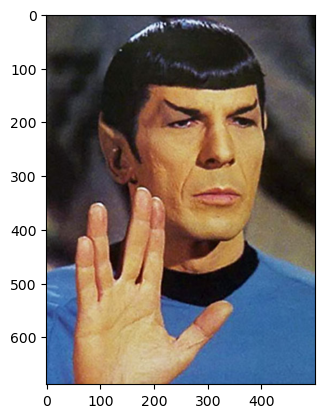

In [22]:
plt.imshow(img)

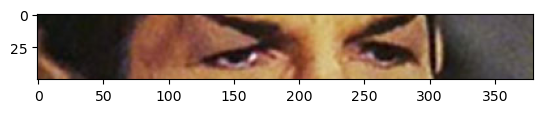

In [23]:
plt.imshow(img[170:220, 100:480]) # slicing in the first two dims!

Now let's look at a single channel. We need to specify the display in greyscale. There are [many other options](https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential).

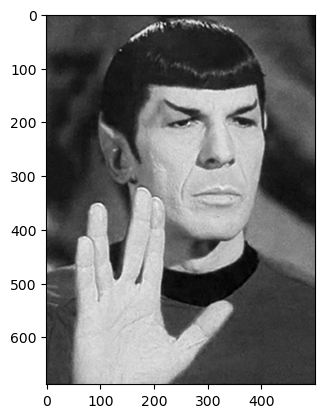

In [24]:
plt.imshow(img[:, :, 0], cmap='gray') # try viridis, plasma, inferno...

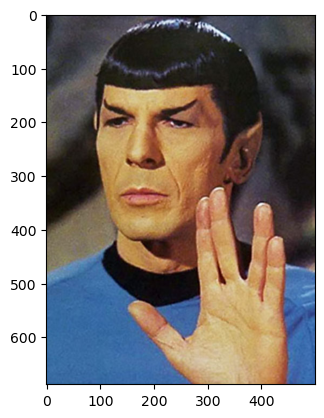

In [25]:
plt.imshow(img[:, ::-1]) # flipped left to right: how do you flip it upside down?

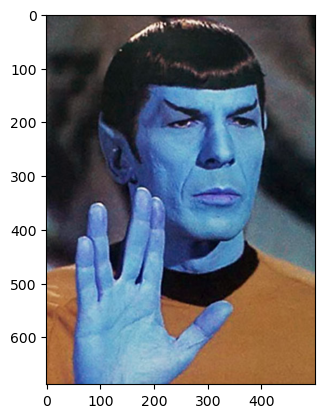

In [26]:
plt.imshow(img[:, :, ::-1]) # reversing the channels!

### Note: handling batches

Almost systematically in ML, we deal with *batches* of images, rather than single ones, to take advantage of parallel computing. That can be handled by adding an additional (batch) dimension at the front of our image array/tensor:

In [27]:
print(img.shape)
img_batch = img.reshape([1, 688, 500, 3])  # note: these numbers must be exact otherwise np complains!
# img_batch = img.reshape([1, *img.shape]) # the same, programmatically unpacking the shape array
# img_batch = np.expand_dims(img, 0)       # the same: 'expands' the zeroth dimension
# img_batch = img[np.newaxis, ...]         # the same newaxis adds an axis, '...' means "the rest of the shape"
# img_batch = img[None, ...]               # the same! None in this context works like np.newaxis
print(img_batch.shape)

(688, 500, 3)
(1, 688, 500, 3)


Other times, you just want to flatten everything:

In [28]:
print(img.shape)
print(img.ravel()[None, ...].shape) # `ravel` flattens, then we add a batch dimension
print(img.reshape([1, -1]).shape)   # the same, '-1' means 'calculate the size of this dimension for me

(688, 500, 3)
(1, 1032000)
(1, 1032000)


## Stacking & combining arrays

### concatenate

In [29]:
a = np.arange(3)
b = np.arange(3,6)
a,b

(array([0, 1, 2]), array([3, 4, 5]))

In [30]:
np.concatenate([a,b])

array([0, 1, 2, 3, 4, 5])

### tile

In [31]:
np.tile(a, 3) # repeat the array three times

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

### vstack, hstack (concatenating vertically, horizontally)

Along an *existing* axis, like concatenate (discussion [here](https://stackoverflow.com/a/61760947)).

In [32]:
a = np.arange(2)
b = np.arange(2,6).reshape(2,2)

a, b

(array([0, 1]),
 array([[2, 3],
        [4, 5]]))

In [33]:
np.vstack([a, b]) # vertically

array([[0, 1],
       [2, 3],
       [4, 5]])

In [34]:
a_col = a[...,None] # to stack horizontally, we turn a into a column vector
print(a_col)
np.hstack([a_col, b]) 

[[0]
 [1]]


array([[0, 2, 3],
       [1, 4, 5]])

### stack

Along a *new* axis (discussion [here](https://stackoverflow.com/a/61760947)).

In [35]:
a = np.arange(3)
b = np.arange(3,6)

a,b

(array([0, 1, 2]), array([3, 4, 5]))

In [36]:
np.stack([a,b], axis=0) # creates a new container 'in axis 0' and puts the two arrays in it

array([[0, 1, 2],
       [3, 4, 5]])

In [37]:
np.stack([a,b], axis=1) # # creates new containers 'in axis 1' and puts the contents of the arrays in them

array([[0, 3],
       [1, 4],
       [2, 5]])

These functions will only work if the size of the arrays we want to combine is **compatible**, i.e. we can only stack horizontally if arrays have the same number of rows, and we can only stack vertically if arrays have the number of columns.

More:
- [joining arrays](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays)
- [splitting arrays](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#splitting-arrays)
- [tiling arrays](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#tiling-arrays)
- [adding and removing elements](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#adding-and-removing-elements)

## Math operations and broadcasting

- [matrix multiplication](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy-matmul)
- [dot product](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
- see [here](https://stackoverflow.com/a/34142617)

In [38]:
a = np.arange(4).reshape((2,2))
print(a)
print(a @ a)            # matrix multiplication
# print(np.matmul(a,a)) # same
# print(a.dot(a))       # dot product, in this case the same

[[0 1]
 [2 3]]
[[ 2  3]
 [ 6 11]]


#### broadcasting

This is the real superpower of NumPy (copied by all ML libraries).

Often you wish to apply the same operations to all elements of a tensor. In plain Python, you need a loop. In NumPy, you use **broadcasting** (which much, *much* faster).

In [39]:
a = np.ones((3,3))
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [40]:
print(a * 9) # works with all basic operations: + - * / **

[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]


In [41]:
a = np.ones((3,3))
b = np.arange(3)
a,b

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([0, 1, 2]))

In [42]:
a.shape, b.shape # b is transformed to shape (1,3), then copied three times

((3, 3), (3,))

In [43]:
a * b # broadcasting vertically

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

In [44]:
a.shape, b[...,None].shape 

((3, 3), (3, 1))

In [45]:
a * b[...,None] # broadcasting horizontally

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.]])

#### Beware, there are rules!

![Sasha Rush broadcasting tweet](images/srush-broadcasting.png)

See also [this tutorial](https://numpy.org/doc/stable/user/basics.broadcasting.html).

## Random numbers


In [46]:
print(np.random.uniform())                    # a number between 0 and 1
print(np.random.uniform(-100, 100))           # a number between -100 and 100
print(np.random.uniform(-10, 10, size=(2,3))) # an array of shape 2x3 with numbers between -10 and 10

0.6789641076271414
-35.24946407690159
[[ 3.030241   -5.70461894  3.55746119]
 [-5.25659635  3.71622095 -7.3124114 ]]


In [47]:
np.random.normal() # a number from a Gaussian distribution: mean 0, standard deviation of 1

0.3840353645666351

In [48]:
np.random.randint(0, 10) # an integer between 0 and 10

8

### Note: random seeds

If we want to always get the same random values, we can set a number as a **seed** to the random number generator.

In [49]:
np.random.seed(100)
print(np.random.uniform(-1, 1, 3))
np.random.seed(100) # try and comment this out
print(np.random.uniform(-1, 1, 3))

[ 0.08680988 -0.44326123 -0.15096482]
[ 0.08680988 -0.44326123 -0.15096482]


### Note: uniform vs normal?

- **Uniform**: flat distribution ('pure' random)
- **Normal**: Gaussian, Bell curve, Normal distribution, centred around around a *mean*, with tails on both ends determined by the *standard deviation*

(Don't worry about the plotting code, it's a [histogram](https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py).)

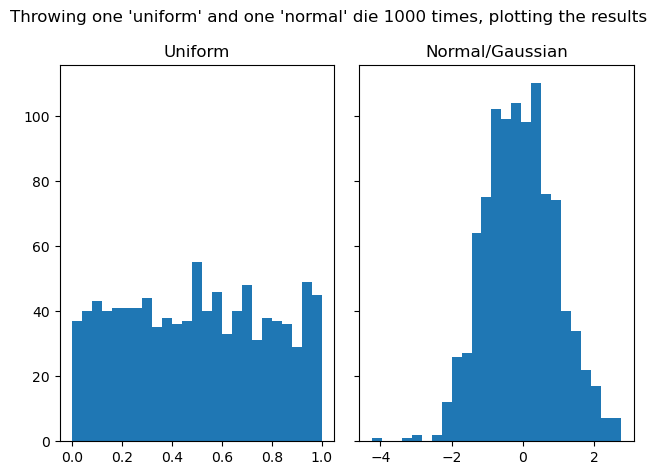

In [50]:
import matplotlib.pyplot as plt

uniform_throws = np.random.uniform(size=(1000,))
normal_throws = np.random.normal(size=(1000,))
                                   
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, tight_layout=True) # 1,2 means: 1 row & 2 columns
fig.suptitle("Throwing one 'uniform' and one 'normal' die 1000 times, plotting the results")
ax1.set_title("Uniform")                                            # ax1 is our 'axes' (the plot object of subplot 1)
ax1.hist(uniform_throws, bins=25)
ax2.set_title("Normal/Gaussian")                                    # ax2 is our 'axes' (the plot object of subplot 2)
ax2.hist(normal_throws, bins=25)
plt.show()

## More operations on arrays

### min, max

In [51]:
z = np.random.uniform(-10, 10, 10) # 10 random numbers between -10 and 10
print(z)
print(np.max(z)) # the biggest number, try np.min()

[ 0.32634797  8.59128624 -8.86590466 -9.37104625  9.34192029 -1.96856406
 -0.19368346  8.59392024  3.26929998 -6.44214668]
9.341920289441134


In [52]:
(z - np.min(z)) / (np.max(z) - np.min(z)) # useful to normalize the array

array([0.5182179 , 0.95988696, 0.0269942 , 0.        , 1.        ,
       0.39558037, 0.490428  , 0.96002771, 0.67548596, 0.15651712])

### argmin, argmax

Often instead of the *value* (min or max), you need its **index**!

In [53]:
p = [0.3, 0.5, 0.1, 0.1]
print(p)
print(np.argmax(p)) # *index* of the max, try np.argmax

[0.3, 0.5, 0.1, 0.1]
1


### sum

We can specify *along which axis* to perform the operation.

(See also [`np.average` and others](https://numpy.org/doc/stable/reference/routines.statistics.html#averages-and-variances).)

In [54]:
z = np.ones((3, 4))
print(z)
print()

print(np.sum(z))             # grand total
print(np.sum(z, axis=0)) # sum along columns
print(np.sum(z, axis=1))     # sum along rows

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

12.0
[3. 3. 3. 3.]
[4. 4. 4.]


Often we want to keep the dimensions intact:

In [55]:
np.sum(z, keepdims=True) # keepdims exists in many NumPy functions

array([[12.]])

### Note: duplicate methods

A lot of these methods also exist as methods, so you can write `z.min()`, `z.sum()`, etc.

More resources:
- [NumPy: the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html)
- [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
- [NumPy fundamentals](https://numpy.org/doc/stable/user/basics.html)
- [Even more learning resources](https://numpy.org/learn/)

---

# Beyond NumPy: TensorFlow

For a notebook covering many similar concepts in TensorFlow:
- see [here](https://drive.google.com/file/d/1xJ-A7PG0pU5S_gTuH2RmuEqTq6orLI-3/view?usp=sharing)
- and its empty, 'quiz' form [here](https://drive.google.com/file/d/1xJ-A7PG0pU5S_gTuH2RmuEqTq6orLI-3/view?usp=sharing)).

---

# Matplotlib (plotting)

One of the most widely used tools for plotting tasks in Python is a package called [Matplotlib](https://matplotlib.org).

In [56]:
import matplotlib.pyplot as plt    # import pyplot submodule, rename it 'plt'

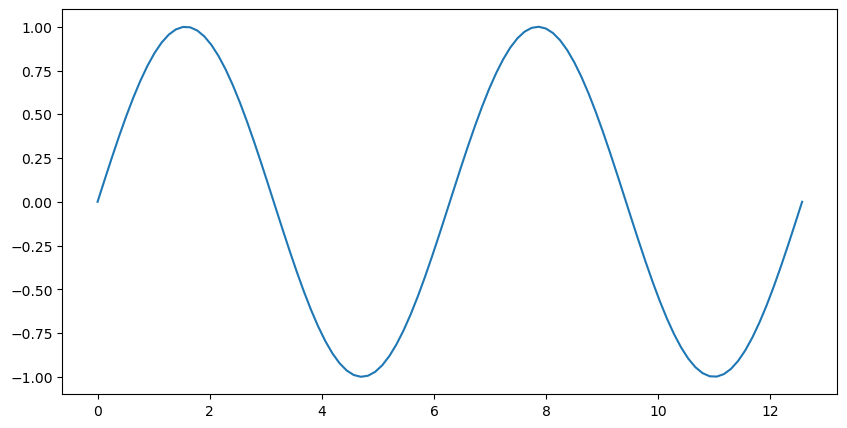

In [57]:
x = np.linspace(0, np.pi * 4, 100) # 100 numbers between 0 and 4 * pi
y = np.sin(x)                      # the sinus of each of these (broadcasting!)

plt.figure(figsize=(10, 5))        # create figure, specifying its size as a tuple (optional, try without it)
plt.plot(x, y)                     # plot the numbers
plt.show()                         # show the plot

### Multiple pieces of data in one plot

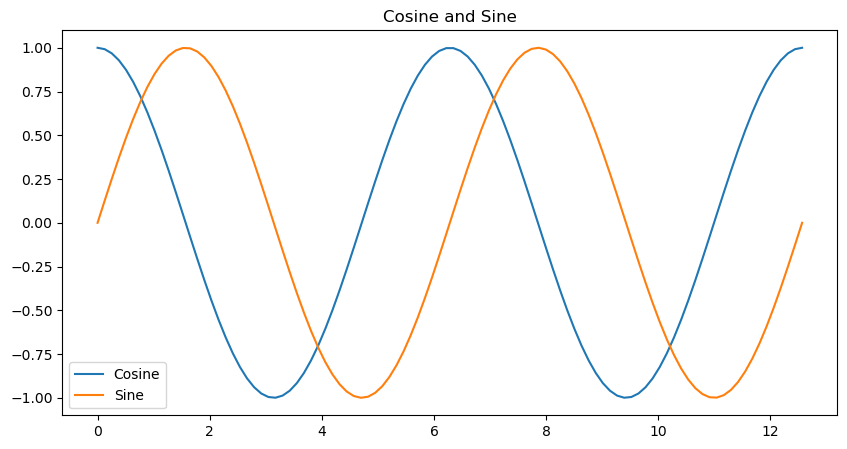

In [58]:
plt.figure(figsize=(10, 5))            # create the figure
plt.title("Cosine and Sine")           # title

plt.plot(x, np.cos(x), label='Cosine') # some data
plt.plot(x, np.sin(x), label='Sine')   # more data

plt.legend()                           # without this, the 'labels' aren't shown
# plt.savefig('myplot.pdf')            # you can save to pdf, png, etc.
plt.show()                             # show the figure

See [the `plot` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), and [the examples](https://matplotlib.org/stable/gallery/index.html).

### Multiple plots, aka subplots

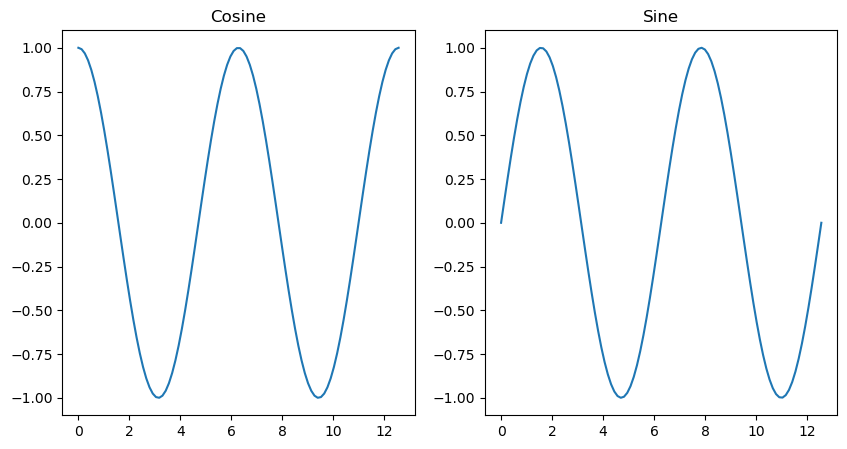

In [59]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)   # (1,2,1) means: 1 row & 2 columns, setting up subplot 1
ax1.set(title="Cosine")      # ax1 is our 'axes' (the plot object of subplot 1)
ax1.plot(x, np.cos(x))

ax2 = plt.subplot(1, 2, 2)   # (1,2,2) means: 1 row & 2 columns, setting up subplot 2
ax2.set(title="Sine")        # ax2 is our 'axes' (the plot object of subplot 2)
ax2.plot(x, np.sin(x))

plt.show()

## Loading and showing images

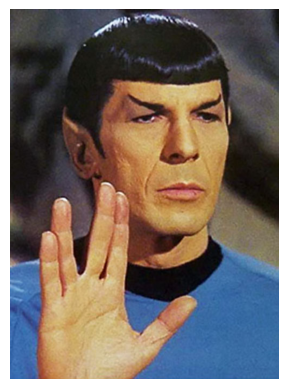

In [60]:
img = plt.imread('images/spock.jpg') # pyplot can load images directly
plt.figure()
plt.imshow(img)
plt.axis('off') # comment this to get the ticks/numbers back
plt.show()

In [61]:
print(img.shape) # this is a np.array
print(img.dtype) # type 'uint8

(688, 500, 3)
uint8


This is a subtlety that we will have do deal with especially when working with images.

We can still do slicing etc for example this will show a detail of only one channel of the image:



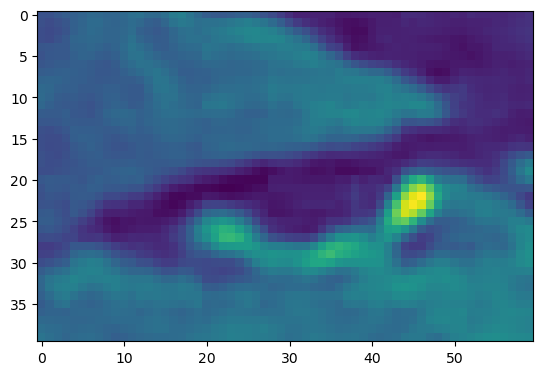

In [78]:
plt.figure()
plt.imshow(img[180:220, 220:280, 2], interpolation='nearest')
plt.show()

Note that we use an optional parameter `interpolation='nearest'`. This indicates that we do not want to filter the image when scaling it and it results in the pixels being shown as distinct squares. More [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html) and [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_antialiasing.html).



More resources:
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
- [Image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html)
- [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)